<a href="https://colab.research.google.com/github/khushu-cs/oibsip/blob/main/oibsip_task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
import pylab
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='darkgrid',font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [3]:
data = pd.read_csv('/content/Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [9]:
data.shape

(200, 4)

In [10]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
data[data.duplicated()].any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [15]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


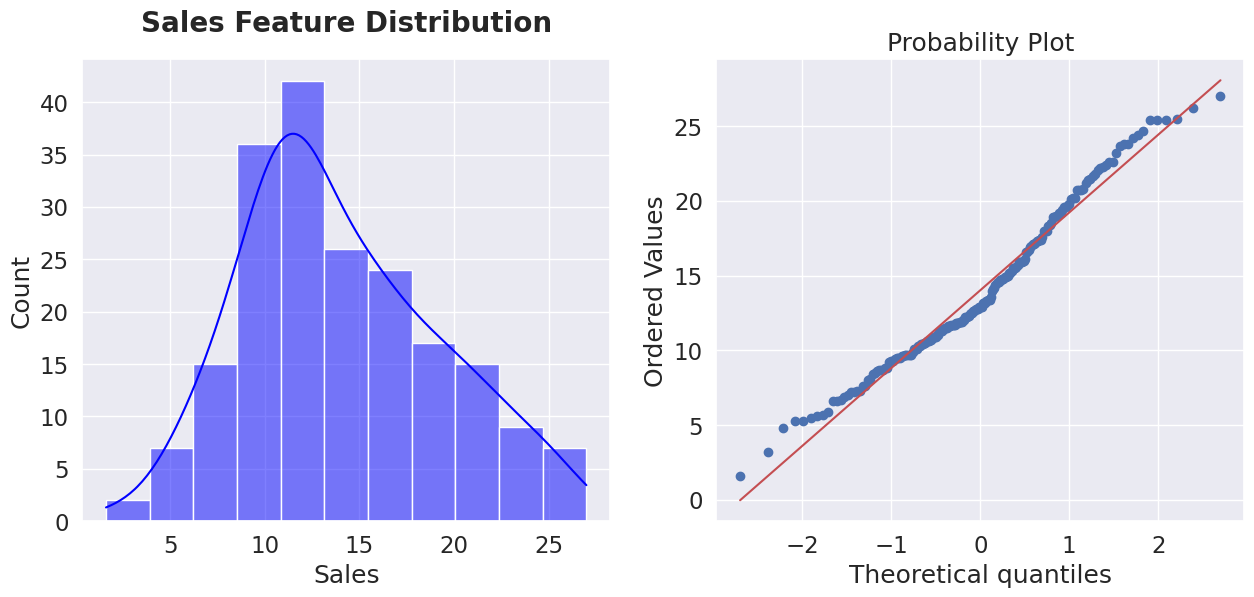

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data['Sales'],color='blue',kde=True)
plt.title('Sales Feature Distribution',fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
stats.probplot(data['Sales'],dist='norm',plot=pylab)
plt.show()

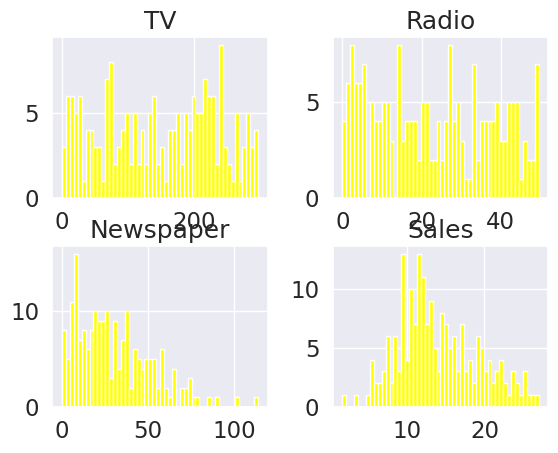

In [24]:
data.hist(bins=50,color='yellow')
plt.show()

In [25]:
import plotly.express as px
fig=px.scatter(data,x='TV',y='Newspaper',color='Sales',size='Radio',hover_data=['Sales'])
fig.show()

In [28]:
fig = px.scatter(data,x='TV',y='Sales' )
fig.show()
fig = px.scatter(data,x='Radio',y='Sales' )
fig.show()
fig = px.scatter(data,x='Newspaper',y='Sales' )
fig.show()

In [30]:
fig=px.box(data,y='Sales')
fig.show()
fig=px.box(data['TV'])
fig.show()
fig=px.box(data['Radio'])
fig.show()
fig=px.box(data['Newspaper'])
fig.show()

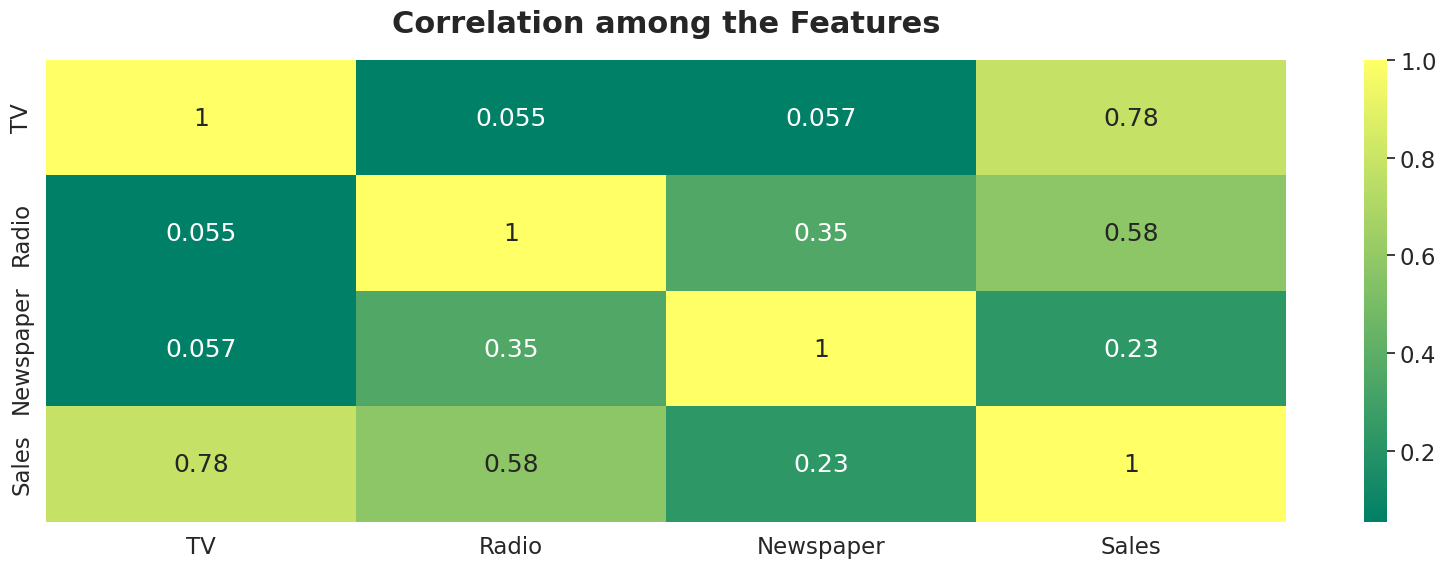

In [31]:
plt.figure(figsize=(20,6))
sns.heatmap(data.corr(),annot=True,cmap='summer')
plt.title('Correlation among the Features',fontweight='black',fontsize=22,pad=20)
plt.show()

In [32]:
x=data.drop(columns=['Sales','Newspaper'])
y = data[['Sales']]

In [33]:
x.head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [34]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((160, 2), (160, 1), (40, 2), (40, 1))

In [36]:
model = LinearRegression()


In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [39]:
r2_score(y_train,train_pred)*100
r2_score(y_test,test_pred)*100

85.16296176286772

In [40]:
mean_squared_error(y_test,test_pred)

2.112478957905096

In [42]:
rms=0.5**mean_squared_error(y_test,test_pred)
rms

0.23124932219000918

In [43]:
mean_absolute_error(y_test,test_pred)

1.1148794924799599

In [44]:
mean_absolute_percentage_error(y_test,test_pred)

0.10170202629838179

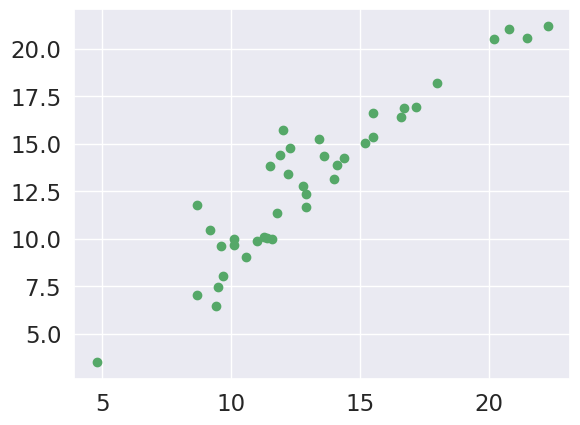

In [45]:
plt.scatter(y_test,test_pred,c='g')